In [149]:
import pandas as pd 

df_artist_net = pd.read_csv("MGDplus/artist_network/global/global-artist_network-2017.csv", delimiter="\t")
df_artist_net

,artist_1,artist_2,count,song_ids
0,Quavo,Travis Scott,22,"['7CRVv14VLogIh8BZLcRpJM', '5TRaIECBIfSkeqkKoG..."
1,Huncho Jack,Quavo,20,"['7CRVv14VLogIh8BZLcRpJM', '5TRaIECBIfSkeqkKoG..."
2,Huncho Jack,Travis Scott,20,"['7CRVv14VLogIh8BZLcRpJM', '5TRaIECBIfSkeqkKoG..."
3,21 Savage,Metro Boomin,13,"['7DuvVy7JfFgXwWlVzyyPys', '0Gux2yTMWYOlcBUNjG..."
4,Calvin Harris,Funk Wav,11,"['0P6AWOA4LG1XOctzaVu5tt', '7iDxZ5Cd0Yg08d4fI5..."
...,...,...,...,...
913,Arcángel,Ozuna,1,['22eADXu8DfOAUEDw4vU8qy']
914,Chris Jedi,J Balvin,1,['22eADXu8DfOAUEDw4vU8qy']
915,Eagles Of Death Metal,Kesha,1,['1nxufatvWIGPPBtPACXzu8']
916,Daya,The Chainsmokers,1,['0QsvXIfqM0zZoerQfsI9lm']


In [150]:
import networkx as nx
import ast

# Create a directed graph object
G = nx.DiGraph()

# Iterate through each row in the DataFrame
for _, row in df_artist_net.iterrows():
    artist_1 = row['artist_1']
    artist_2 = row['artist_2']
    count = row['count']
    song_ids = ast.literal_eval(row['song_ids'])  # Convert string representation of list to actual list

    G.add_node(artist_1)
    G.add_node(artist_2)
    # Add edge between artist_1 and artist_2
    G.add_edge(artist_1, artist_2, count=count, song_ids=song_ids)

# Example: Get attributes of an edge
edge_data = G.edges[('Quavo', 'Travis Scott')]
#print(edge_data['count'])
#print(edge_data['song_ids'])

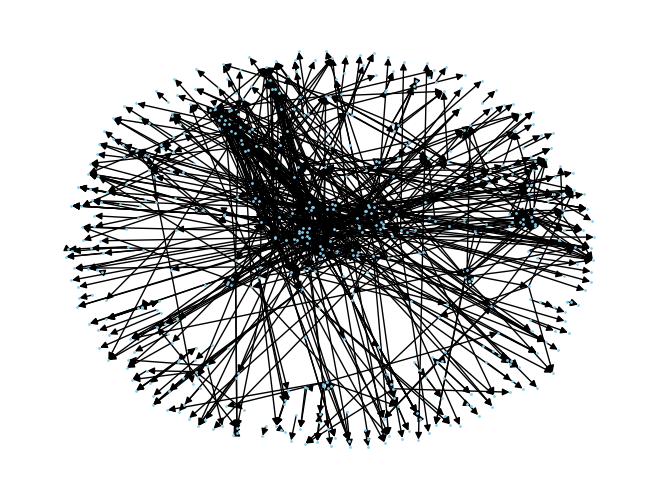

In [151]:
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)

# Display the plot
#plt.savefig("original_control_network.png")
plt.show()

In [152]:
df_artist = pd.read_csv("MGDplus/artists/global/global-artists-2017.csv", delimiter="\t")
df_artist

,artist_id,name,genres,num_hits,num_collab_hits
0,1RyvyyTE3xzB2ZywiAwp0i,Future,"['atl hip hop', 'hip hop', 'rap', 'southern hi...",50,31
1,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,"['hip hop', 'rap', 'slap house']",42,40
2,3TVXtAsR1Inumwj472S9r4,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'...",39,21
3,7dGJo4pcD2V6oG8kP0tJRR,Eminem,"['detroit hip hop', 'hip hop', 'rap']",36,17
4,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,"['pop', 'singer-songwriter pop', 'uk pop']",36,10
...,...,...,...,...,...
688,77DAFfvm3O9zT5dIoG0eIO,Kyla,['uk funky'],1,1
689,4LcUpNlXFEleaLlelmkv2R,Kris Kross Amsterdam,"['dutch house', 'dutch pop']",1,1
690,4SsVbpTthjScTS7U2hmr1X,Arcángel,"['latin hip hop', 'reggaeton', 'trap latino', ...",1,1
691,02uYdhMhCgdB49hZlYRm9o,Eagles Of Death Metal,"['garage rock', 'garage rock revival', 'modern...",1,1


In [153]:
# Create a graph object
G2 = nx.Graph()

collab_counter = 0

# Iterate through each row in the DataFrame
for _, row in df_artist_net.iterrows():
    artist_1 = row['artist_1']
    artist_2 = row['artist_2']
    count = row['count']
    song_ids = ast.literal_eval(row['song_ids'])  # Convert string representation of list to actual list

    artist_1_row = df_artist[(df_artist["name"] == artist_1)]
    artist_2_row = df_artist[(df_artist["name"] == artist_2)]
    G2.add_node(artist_1, num_hits=int(artist_1_row["num_hits"].iloc[0]), num_collab_hits=int(artist_1_row["num_collab_hits"].iloc[0]))
    G2.add_node(artist_2, num_hits=int(artist_2_row["num_hits"].iloc[0]), num_collab_hits=int(artist_2_row["num_collab_hits"].iloc[0]))
    # Add edge between artist_1 and artist_2
    
    G2.add_edge(artist_1, artist_2, count=count, song_ids=song_ids)


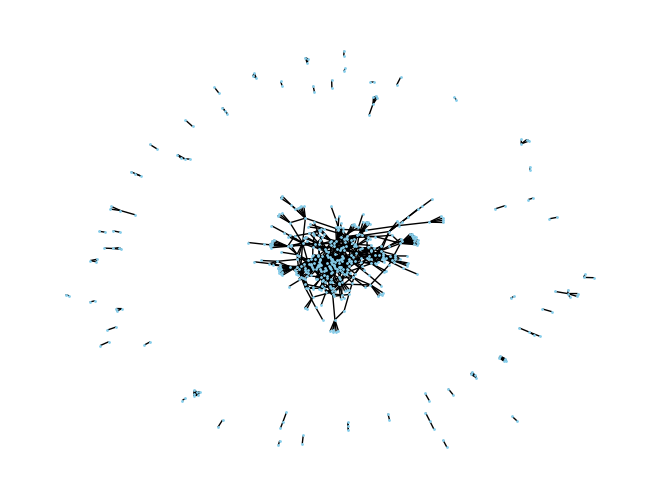

In [154]:

# Draw the graph
nx.draw(G2, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)

# Display the plot
#plt.savefig("original_control_network.png")
plt.show()

erstellen über directed oder undirected?

duplikation checken

es gibt keine Duplikation => undirected

Datensatz vereinfacht netzwerkerstellung

Frage:
inwiefern ist Vergleichbarkeit gewährleistbar?

In [155]:
num_nodes = G2.number_of_nodes()
num_edges = G2.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 512
Number of edges: 918


In [156]:
import pandas as pd
import community
import networkx as nx

# Assuming G is your graph object containing nodes and edges

# Get all connected components
connected_components = nx.connected_components(G2)

# Initialize dictionaries to store metrics for each node
degree = {}
weighted_degree = {}
eccentricity = {}
closeness_centrality = {}
harmonic_closeness_centrality = {}
betweenness_centrality = {}
modularity_class = {}
clustering = {}
eigenvector_centrality = {}

# For each connected component
for cc in connected_components:
    # Create a subgraph of G consisting only of this component
    Gc = G2.subgraph(cc).copy()

    # Calculate metrics for this component
    degree.update(dict(Gc.degree()))
    weighted_degree.update(dict(Gc.degree(weight='count')))
    eccentricity.update(nx.eccentricity(Gc))
    closeness_centrality.update(nx.closeness_centrality(Gc))
    harmonic_closeness_centrality.update(nx.harmonic_centrality(Gc))
    betweenness_centrality.update(nx.betweenness_centrality(Gc))
    partition = community.best_partition(Gc)
    modularity_class.update(partition)
    clustering.update(nx.clustering(Gc))
    eigenvector_centrality.update(nx.eigenvector_centrality(Gc))

# Assign metrics as node attributes in the original graph G
nx.set_node_attributes(G2, degree, 'degree')
nx.set_node_attributes(G2, weighted_degree, 'weighted degree')
nx.set_node_attributes(G2, eccentricity, 'Eccentricity')
nx.set_node_attributes(G2, closeness_centrality, 'closnesscentrality')
nx.set_node_attributes(G2, harmonic_closeness_centrality, 'harmonicclosnesscentrality')
nx.set_node_attributes(G2, betweenness_centrality, 'betweenesscentrality')
nx.set_node_attributes(G2, modularity_class, 'modularity_class')
nx.set_node_attributes(G2, clustering, 'clustering')
nx.set_node_attributes(G2, eigenvector_centrality, 'eigencentrality')

In [157]:
import pandas as pd

# Assuming G is your NetworkX graph

# Extract nodes and their attributes from the graph
nodes_with_attributes = [(node, G2.nodes[node]) for node in G.nodes()]

# Create a DataFrame from the nodes and their attributes
df_nodes = pd.DataFrame(nodes_with_attributes, columns=['Node', 'Attributes'])

# Normalize the 'Attributes' column to expand it into separate columns
df_attributes = pd.json_normalize(df_nodes['Attributes'])

# Combine the original 'Node' column with the expanded attributes
df_nodes = pd.concat([df_nodes['Node'], df_attributes], axis=1)

# Display the DataFrame
df_nodes


,Node,num_hits,num_collab_hits,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality
0,Quavo,31,31,19,67,7,0.312183,135.064286,0.057035,0,0.222222,0.178839
1,Travis Scott,42,40,26,83,7,0.310345,138.352381,0.040779,0,0.233846,0.296034
2,Huncho Jack,20,20,4,43,8,0.250850,103.617857,0.000008,0,0.833333,0.056704
3,21 Savage,24,18,12,33,7,0.288732,123.852381,0.004522,0,0.454545,0.167994
4,Metro Boomin,20,20,9,37,8,0.283193,120.403571,0.003144,0,0.583333,0.134886
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Kyla,1,1,2,2,9,0.231348,94.483730,0.000000,0,1.000000,0.018899
508,Kris Kross Amsterdam,1,1,1,1,9,0.185148,73.932540,0.000000,7,0.000000,0.000123
509,Arcángel,1,1,3,3,7,0.238526,97.935714,0.000000,6,1.000000,0.006608
510,Eagles Of Death Metal,1,1,1,1,11,0.152479,59.979401,0.000000,11,0.000000,0.000049


In [158]:
df_attributes

,num_hits,num_collab_hits,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality
0,31,31,19,67,7,0.312183,135.064286,0.057035,0,0.222222,0.178839
1,42,40,26,83,7,0.310345,138.352381,0.040779,0,0.233846,0.296034
2,20,20,4,43,8,0.250850,103.617857,0.000008,0,0.833333,0.056704
3,24,18,12,33,7,0.288732,123.852381,0.004522,0,0.454545,0.167994
4,20,20,9,37,8,0.283193,120.403571,0.003144,0,0.583333,0.134886
...,...,...,...,...,...,...,...,...,...,...,...
507,1,1,2,2,9,0.231348,94.483730,0.000000,0,1.000000,0.018899
508,1,1,1,1,9,0.185148,73.932540,0.000000,7,0.000000,0.000123
509,1,1,3,3,7,0.238526,97.935714,0.000000,6,1.000000,0.006608
510,1,1,1,1,11,0.152479,59.979401,0.000000,11,0.000000,0.000049


In [159]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = df_nodes.columns[3:]  # Exclude the first and last columns
data_to_normalize = df_nodes[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_norm = df_nodes.copy()
df_nodes_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_norm


,Node,num_hits,num_collab_hits,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality
0,Quavo,31,31,0.580645,0.804878,0.6,0.216299,0.885929,0.057035,0.000000,0.222222,0.252916
1,Travis Scott,42,40,0.806452,1.000000,0.6,0.214205,0.907658,0.040779,0.000000,0.233846,0.418655
2,Huncho Jack,20,20,0.096774,0.512195,0.7,0.146416,0.678124,0.000008,0.000000,0.833333,0.080191
3,21 Savage,24,18,0.354839,0.390244,0.6,0.189579,0.811838,0.004522,0.000000,0.454545,0.237578
4,Metro Boomin,20,20,0.258065,0.439024,0.7,0.183267,0.789048,0.003144,0.000000,0.583333,0.190757
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Kyla,1,1,0.032258,0.012195,0.8,0.124195,0.617763,0.000000,0.000000,1.000000,0.026727
508,Kris Kross Amsterdam,1,1,0.000000,0.000000,0.8,0.071555,0.481956,0.000000,0.583333,0.000000,0.000173
509,Arcángel,1,1,0.064516,0.024390,0.6,0.132374,0.640575,0.000000,0.500000,1.000000,0.009344
510,Eagles Of Death Metal,1,1,0.000000,0.000000,1.0,0.034332,0.389750,0.000000,0.916667,0.000000,0.000069


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10


C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWa

10/10


C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


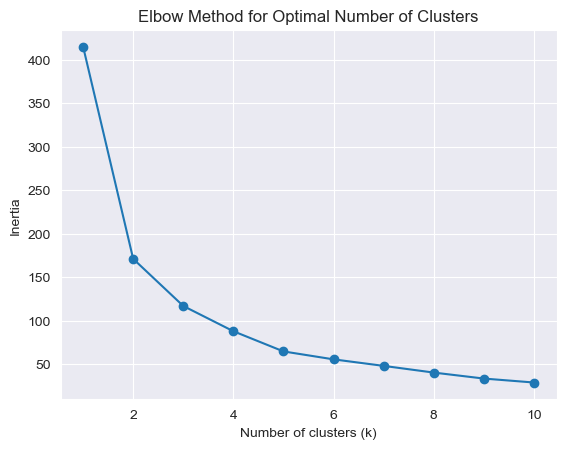

In [160]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_norm.iloc[:,3:]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [161]:
from sklearn.cluster import KMeans

# Assuming df_nodes is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_norm.iloc[:,3:]

# Specify the number of clusters (k)
k = 3  # Adjust as needed

# Initialize KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes['Cluster'] = cluster_labels
df_nodes_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes


C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Node,num_hits,num_collab_hits,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality,Cluster
0,Quavo,31,31,19,67,7,0.312183,135.064286,0.057035,0,0.222222,0.178839,0
1,Travis Scott,42,40,26,83,7,0.310345,138.352381,0.040779,0,0.233846,0.296034,0
2,Huncho Jack,20,20,4,43,8,0.250850,103.617857,0.000008,0,0.833333,0.056704,2
3,21 Savage,24,18,12,33,7,0.288732,123.852381,0.004522,0,0.454545,0.167994,0
4,Metro Boomin,20,20,9,37,8,0.283193,120.403571,0.003144,0,0.583333,0.134886,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Kyla,1,1,2,2,9,0.231348,94.483730,0.000000,0,1.000000,0.018899,2
508,Kris Kross Amsterdam,1,1,1,1,9,0.185148,73.932540,0.000000,7,0.000000,0.000123,0
509,Arcángel,1,1,3,3,7,0.238526,97.935714,0.000000,6,1.000000,0.006608,2
510,Eagles Of Death Metal,1,1,1,1,11,0.152479,59.979401,0.000000,11,0.000000,0.000049,0


In [162]:
# Assuming df_nodes is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
0    254
1    142
2    116
Name: count, dtype: int64


In [163]:
##Dimensional reduction:

import pandas as pd
from sklearn.decomposition import PCA

# Assuming df is your DataFrame

# Omit the first and last columns
X = df_nodes_norm.iloc[:,3:-1]

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(X)

# Convert the result to a DataFrame
df_2d = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])

# Display the resulting DataFrame
df_2d["Node"] = df_nodes["Node"]
df_2d["Cluster"] = df_nodes["Cluster"]
df_2d

,Component 1,Component 2,Node,Cluster
0,-0.170202,-0.124051,Quavo,0
1,-0.107025,-0.113459,Travis Scott,0
2,-0.293837,0.477388,Huncho Jack,2
3,-0.166795,0.107594,21 Savage,0
4,-0.241056,0.229744,Metro Boomin,2
...,...,...,...,...
507,-0.357695,0.637711,Kyla,2
508,-0.457002,-0.398775,Kris Kross Amsterdam,0
509,-0.437091,0.614444,Arcángel,2
510,-0.643915,-0.435025,Eagles Of Death Metal,0


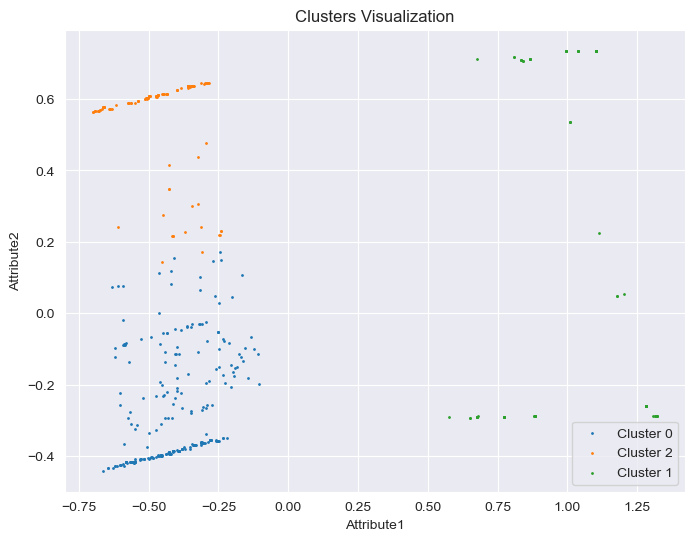

In [164]:
import matplotlib.pyplot as plt

# Assuming df_nodes is your DataFrame with cluster labels

# Plot the clusters in a scatter plot
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in df_2d['Cluster'].unique():
    # Filter the DataFrame for nodes in the current cluster
    df_cluster = df_2d[df_2d['Cluster'] == cluster_label]
    # Plot the nodes in the cluster
    plt.scatter(df_cluster["Component 1"], df_cluster["Component 2"], s=1, label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Clusters Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


In [168]:
radar_df = df_nodes_norm.copy()
features = radar_df.columns[3:-1]
print(features)
for feature in features:
    radar_df[feature] = (radar_df[feature] >= 0.5).astype(int)

# Define new order of columns
new_order = ['Node', 'num_hits', 'num_collab_hits', "degree", "weighted degree", "closnesscentrality", "Eccentricity", "betweenesscentrality", "eigencentrality", "harmonicclosnesscentrality", "modularity_class", "clustering", "Cluster"]

# Reindex columns to new order
radar_df = radar_df[new_order]

radar_df

Index(['degree', 'weighted degree', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality',
       'modularity_class', 'clustering', 'eigencentrality'],
      dtype='object')


,Node,num_hits,num_collab_hits,degree,weighted degree,closnesscentrality,Eccentricity,betweenesscentrality,eigencentrality,harmonicclosnesscentrality,modularity_class,clustering,Cluster
0,Quavo,31,31,1,1,0,1,0,0,1,0,0,0
1,Travis Scott,42,40,1,1,0,1,0,0,1,0,0,0
2,Huncho Jack,20,20,0,1,0,1,0,0,1,0,1,2
3,21 Savage,24,18,0,0,0,1,0,0,1,0,0,0
4,Metro Boomin,20,20,0,0,0,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Kyla,1,1,0,0,0,1,0,0,1,0,1,2
508,Kris Kross Amsterdam,1,1,0,0,0,1,0,0,0,1,0,0
509,Arcángel,1,1,0,0,0,1,0,0,1,1,1,2
510,Eagles Of Death Metal,1,1,0,0,0,1,0,0,0,1,0,0


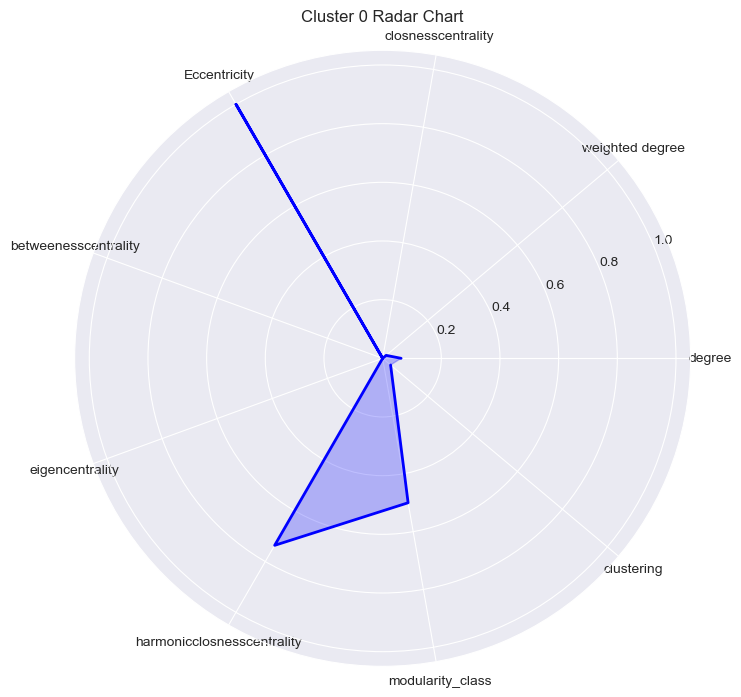

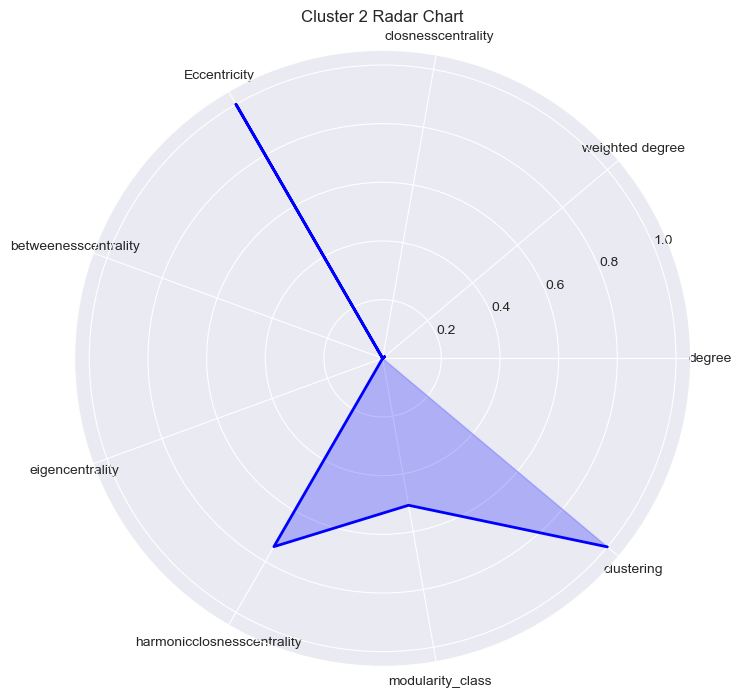

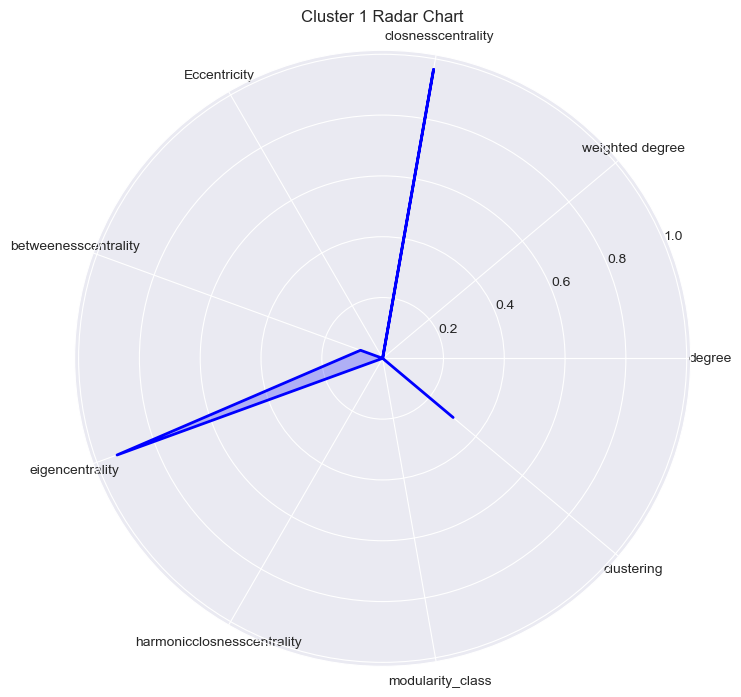

In [175]:
import numpy as np
import matplotlib.pyplot as plt

#for radar charts values to 1 if 0.5 or higher, rest to 0?
#######Profiles?##########

# Define the attributes for the radar chart
attributes = radar_df.iloc[:,3:-1].columns.tolist()

# Define the theta values (angles) for each attribute
theta = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False)

# Iterate over each unique cluster label
for cluster_label in radar_df['Cluster'].unique():
    # Create a figure and add a subplot with polar projection for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Filter the DataFrame for the current cluster
    cluster_data = radar_df[radar_df['Cluster'] == cluster_label]

    # Get attribute values for the current cluster
    values = cluster_data.iloc[:,3:-1].mean(axis=0).tolist()

    # Repeat the first value to close the plot
    #values += values[:1]

    # Plot the radar chart
    ax.fill(theta, values, color='blue', alpha=0.25)
    ax.plot(theta, values, color='blue', linewidth=2)

    # Set the labels for each attribute
    ax.set_xticks(theta)
    ax.set_xticklabels(attributes)

    # Set the title for the radar chart
    ax.set_title(f'Cluster {cluster_label} Radar Chart')

    # Show plot
    plt.show()


In [178]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = df_nodes.columns[1:]  # Exclude the first and last columns
data_to_normalize = df_nodes[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_norm = df_nodes.copy()
df_nodes_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_norm


,Node,num_hits,num_collab_hits,degree,weighted degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,clustering,eigencentrality,Cluster
0,Quavo,0.612245,0.769231,0.580645,0.804878,0.6,0.216299,0.885929,0.057035,0.000000,0.222222,0.252916,0.0
1,Travis Scott,0.836735,1.000000,0.806452,1.000000,0.6,0.214205,0.907658,0.040779,0.000000,0.233846,0.418655,0.0
2,Huncho Jack,0.387755,0.487179,0.096774,0.512195,0.7,0.146416,0.678124,0.000008,0.000000,0.833333,0.080191,1.0
3,21 Savage,0.469388,0.435897,0.354839,0.390244,0.6,0.189579,0.811838,0.004522,0.000000,0.454545,0.237578,0.0
4,Metro Boomin,0.387755,0.487179,0.258065,0.439024,0.7,0.183267,0.789048,0.003144,0.000000,0.583333,0.190757,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Kyla,0.000000,0.000000,0.032258,0.012195,0.8,0.124195,0.617763,0.000000,0.000000,1.000000,0.026727,1.0
508,Kris Kross Amsterdam,0.000000,0.000000,0.000000,0.000000,0.8,0.071555,0.481956,0.000000,0.583333,0.000000,0.000173,0.0
509,Arcángel,0.000000,0.000000,0.064516,0.024390,0.6,0.132374,0.640575,0.000000,0.500000,1.000000,0.009344,1.0
510,Eagles Of Death Metal,0.000000,0.000000,0.000000,0.000000,1.0,0.034332,0.389750,0.000000,0.916667,0.000000,0.000069,0.0


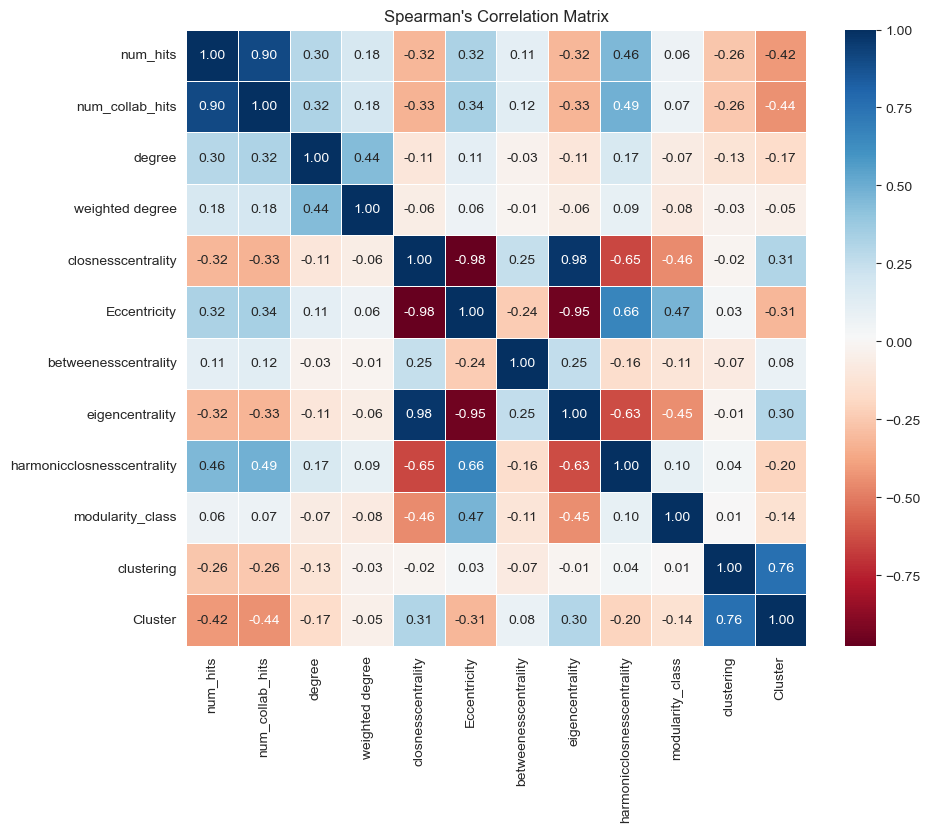

In [179]:
import seaborn as sns

# Compute Spearman's correlation matrix
corr_matrix = radar_df.iloc[:,1:].corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman's Correlation Matrix")
plt.show()


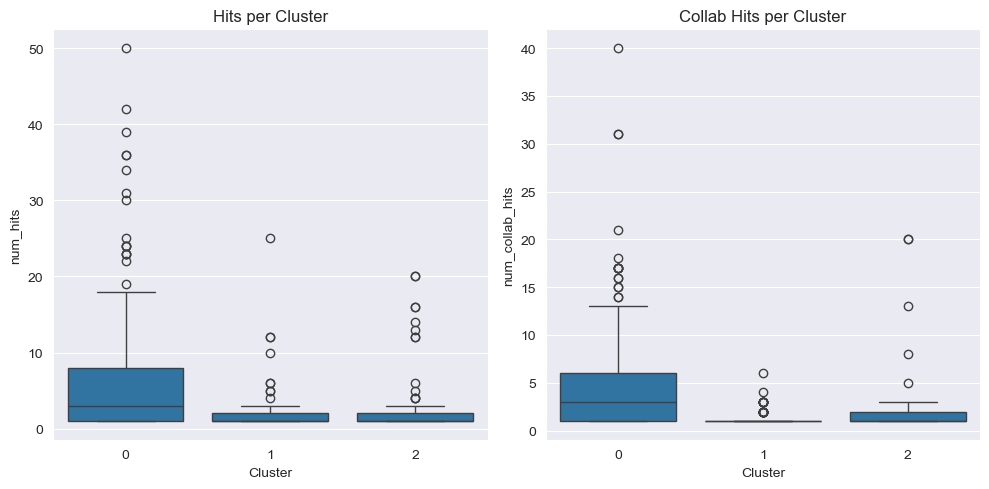

In [180]:
# Plot boxplots for followers and popularity per cluster
plt.figure(figsize=(10, 5))

# Boxplot for followers per cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='num_hits', data=df_nodes)
plt.title('Hits per Cluster')

# Boxplot for popularity per cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='num_collab_hits', data=df_nodes)
plt.title('Collab Hits per Cluster')

plt.tight_layout()
plt.show()